In [21]:
import pandas as pd
import textblob

reviews = pd.read_table("E://Yelp//Unfiltered data//YelpZip//reviewContent", header = None)
meta =pd.read_table("E://Yelp//Unfiltered data//YelpZip//metadata", header = None)

In [28]:
review = pd.merge(reviews, meta, on = [0,1], how="inner")
review.shape

(608458, 7)

In [30]:
review = review[['3_x', '3_y', '2_y']]
review.head()

,3_x,3_y,2_y
0,"Drinks were bad, the hot chocolate was watered...",-1,1.0
1,This was the worst experience I've ever had a ...,-1,1.0
2,This is located on the site of the old Spruce ...,-1,3.0
3,I enjoyed coffee and breakfast twice at Toast ...,-1,5.0
4,I love Toast! The food choices are fantastic -...,-1,5.0
5,The egg on an English muffin (their take on eg...,-1,5.0
6,wonderful relaxed vibe and fantastic homemade ...,-1,5.0
7,Extremely slow kitchen. I went with an hour to...,1,1.0
8,I really wanted to love toast. It's quaint and...,1,2.0
9,First brunch experience here in Philly (actual...,1,4.0


In [32]:
review.head()

,3_x,3_y,2_y
0,"Drinks were bad, the hot chocolate was watered...",-1,1.0
1,This was the worst experience I've ever had a ...,-1,1.0
2,This is located on the site of the old Spruce ...,-1,3.0
3,I enjoyed coffee and breakfast twice at Toast ...,-1,5.0
4,I love Toast! The food choices are fantastic -...,-1,5.0


In [33]:
review.columns = ['review', 'real', 'rating']
review.head()

,review,real,rating
0,"Drinks were bad, the hot chocolate was watered...",-1,1.0
1,This was the worst experience I've ever had a ...,-1,1.0
2,This is located on the site of the old Spruce ...,-1,3.0
3,I enjoyed coffee and breakfast twice at Toast ...,-1,5.0
4,I love Toast! The food choices are fantastic -...,-1,5.0


In [34]:
review.to_csv("E://Yelp//Unfiltered data//YelpZip//textonly", header = None)

In [44]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import base64
import string
import re
from collections import Counter
from time import time
from nltk.corpus import stopwords
from sklearn.metrics import log_loss
stopwords = stopwords.words('english')
sns.set_context('notebook')

In [38]:
from sklearn.model_selection import train_test_split

X = review[['review', 'rating']]
Y = review[['real']]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(486766, 2) (486766, 1)
(121692, 2) (121692, 1)


In [40]:
print(X_train.head())
print(X_train.info())

                                                   review  rating
212057  My friends and I went here for our friends giv...     5.0
5714    good service tasty food music was a little too...     3.0
307690  The most important thing that can be said for ...     4.0
144594  One of the nastiest and greasiest pizza's that...     1.0
463435  Philadelphia is a mecca for cheesesteaks.  Unf...     2.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 486766 entries, 212057 to 404016
Data columns (total 2 columns):
review    486766 non-null object
rating    486766 non-null float64
dtypes: float64(1), object(1)
memory usage: 11.1+ MB
None


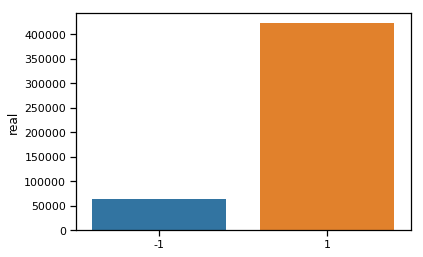

In [42]:
sns.barplot(x = [1,-1], y = y_train['real'].value_counts())
plt.show()

In [ ]:
fake = review[review['real'] == -1]
ft = ' '.join(text for text in review['review'])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(ft)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
real = review[review['real'] == 1]
rt = ' '.join(text for text in review['review'])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(rt)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Enter Spacy - the industrial strength word processor!